<h2>Quadratic Regression Dataset - Linear Regression vs XGBoost</h2>

Model is trained with XGBoost installed in notebook instance

In the later examples, we will train using SageMaker's XGBoost algorithm.

Training on SageMaker takes several minutes (even for simple dataset).  

If algorithm is supported on Python, we will try them locally on notebook instance

This allows us to quickly learn an algorithm, understand tuning options and then finally train on SageMaker Cloud

In this exercise, let's compare XGBoost and Linear Regression for Quadratic regression dataset

In [ ]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!pip install xgboost

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Linear Regression
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./data/quadratic_all.csv')

In [3]:
df.head()

,x,y
0,-20.0,2473.236825
1,-19.8,2405.673895
2,-19.6,2444.523136
3,-19.4,2320.437236
4,-19.2,2288.088295


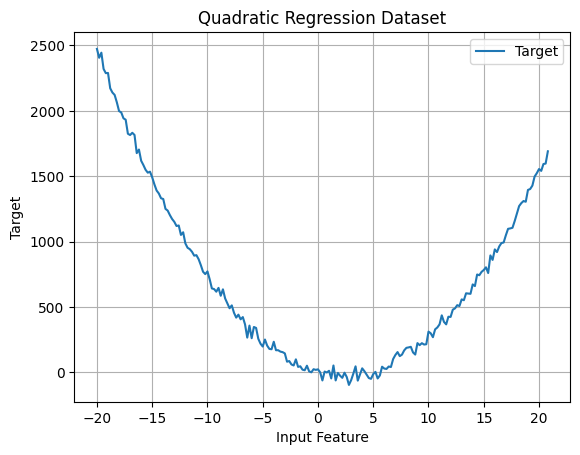

In [4]:
plt.plot(df.x,df.y,label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Quadratic Regression Dataset')
plt.show()

In [9]:
train_file = './data/quadratic_train.csv'
validation_file = './data/quadratic_validation.csv'

# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=['y','x'])
df_validation = pd.read_csv(validation_file,names=['y','x'])

In [10]:
# Add quadratic term (x²) to both training and validation sets
df_train['x2'] = df_train['x']**2
df_validation['x2'] = df_validation['x']**2

In [11]:
df_train.head()

,y,x,x2
0,343.968005,10.8,116.64
1,1585.894405,-15.8,249.64
2,1497.303317,19.6,384.16
3,769.909912,-10.4,108.16
4,1173.230755,-13.2,174.24


In [12]:
df_validation.head()

,y,x,x2
0,1824.856344,-17.2,295.84
1,16.997917,-1.2,1.44
2,1832.141730,-16.8,282.24
3,1395.206684,19.0,361.00
4,145.840543,-3.0,9.00


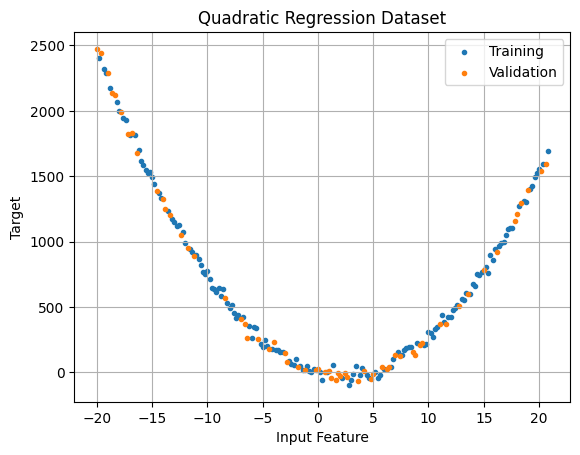

In [13]:
plt.scatter(df_train.x, df_train.y,label='Training',marker='.')
plt.scatter(df_validation.x, df_validation.y,label='Validation',marker='.')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.title('Quadratic Regression Dataset')
plt.legend()
plt.show()

In [14]:
# Training data split with both x and x² features
X_train = df_train.iloc[:,1:]  # Now includes both 'x' and 'x2' columns

# Training target split:
# iloc[:,0] selects first column
# ravel() converts to 1D array (required by many ML algorithms)
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

# Validation data split:
# Same process as training data but using validation dataset
X_validation = df_validation.iloc[:,1:]

# Validation target split:
# Same process as training target
y_validation = df_validation.iloc[:,0].ravel()

## Linear Regression Algorithm

In [15]:
lin_regressor = LinearRegression()

In [16]:
lin_regressor.fit(X_train, y_train)

LinearRegression()

Compare Weights assigned by Linear Regression.

Original Function: 5*x**2 -23*x + 47 + some noise

Linear Regression Function: -15.08 * x + 709.86 

Linear Regression Coefficients and Intercepts are not close to actual

In [17]:
lin_regressor.coef_

array([-22.98286274,   4.98161803])

In [18]:
lin_regressor.intercept_

5.868107552517017

In [22]:
# Optional: Add prediction and evaluation
y_pred_train = lin_regressor.predict(X_train)
y_pred_val = lin_regressor.predict(X_validation)

y_pred_train
y_pred_val

array([1874.93522564,   40.62107281, 1797.9920753 , 1367.55782532,
        119.65125808, 1208.33780234,  203.43682875,   63.37770292,
         54.86775573,   10.32684586,  374.55428318, 1993.33892198,
        -19.36060296,  -18.15153067,    5.86810755,   89.08735196,
       1269.56003431, 1722.64304272,  230.00496715,  614.70124561,
       1056.82919434,  357.00550375, 2370.0706009 , 1271.73095163,
       1646.4205635 ,  -12.13313716,  527.87576295,  -20.1711458 ,
         62.82486062, 2458.17257564,  550.42712302, 2240.90660961,
       1574.3137023 ,   -6.1282276 ,   40.14913426,  970.70638285,
        -14.53779777,  108.58832673,   -2.78417387,  216.06992062,
         15.49424466,  109.27600862, 1304.02532044,  781.98922381,
        410.84743038,  888.17033635, 1403.29960354,  177.50544706,
        940.92156767,  -20.21159768,  176.65595767, 2156.7899293 ,
        409.59342224,  -20.59664316,  355.83239936, 1206.22082085,
       2115.32938331,  275.23954822,  189.39541588,  -12.30842

In [24]:
#result = lin_regressor.predict(df_validation[['x']])
result = lin_regressor.predict(df_validation[['x', 'x2']])

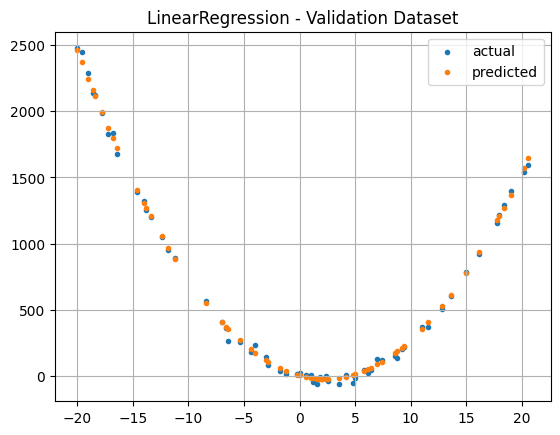

In [25]:
plt.title('LinearRegression - Validation Dataset')
plt.scatter(df_validation.x,df_validation.y,label='actual',marker='.')
plt.scatter(df_validation.x,result,label='predicted',marker='.')
plt.grid(True)
plt.legend()
plt.show()

In [26]:
# RMSE Metrics
print('Linear Regression Metrics')
mse = mean_squared_error(df_validation.y,result)
print(" Mean Squared Error: {0:.2f}".format(mse))
print(" Root Mean Square Error: {0:.2f}".format(mse**.5))

Linear Regression Metrics
 Mean Squared Error: 927.22
 Root Mean Square Error: 30.45


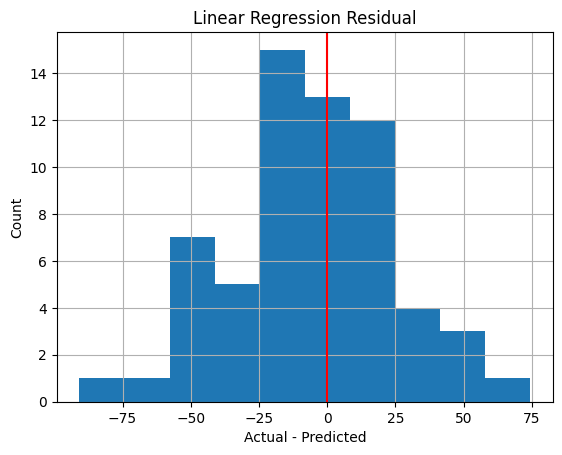

In [27]:
# Residual
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = df_validation.y - result
plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Linear Regression Residual')
plt.axvline(color='r')
plt.show()

In [28]:
# Count number of values greater than zero and less than zero
value_counts = (residuals > 0).value_counts(sort=False)

print(' Under Estimation: {0}'.format(value_counts[True]))
print(' Over  Estimation: {0}'.format(value_counts[False]))

 Under Estimation: 25
 Over  Estimation: 37


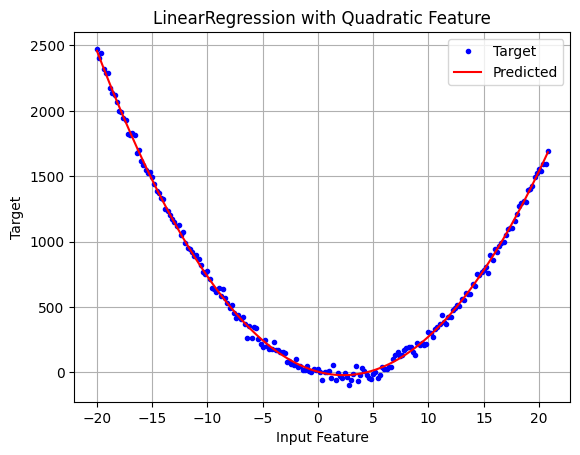

In [30]:
# Plot for entire dataset
plt.plot(df.x, df.y, 'b.', label='Target')  # Use dots for actual data

# Create sorted x values for smoother prediction line
x_sorted = np.sort(df.x)
X_plot = pd.DataFrame({'x': x_sorted})
X_plot['x2'] = X_plot['x']**2

# Generate predictions
predictions = lin_regressor.predict(X_plot[['x', 'x2']])

# Plot the prediction line
plt.plot(x_sorted, predictions, 'r-', label='Predicted')

plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('LinearRegression with Quadratic Feature')
plt.show()